## Exercise 19: A Decision Tree in scikit-learn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

import graphviz

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-Projects-with-Python/master/Data/Chapter_1_cleaned_data.csv')


In [3]:
features_response = df.columns.tolist()
items_to_remove =  ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
'PAY_6', 'EDUCATION_CAT', 'graduate school', 'high school','none', 'others', 'university']

In [4]:
features_response = [item for item in features_response if item not in items_to_remove]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[features_response[:-1]].values, df['default payment next month'], test_size=0.3, random_state=0)

In [7]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [8]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features_response[:-1], class_names=['No', 'Yes'], filled=True, rounded=True, special_characters=True,proportion=True)

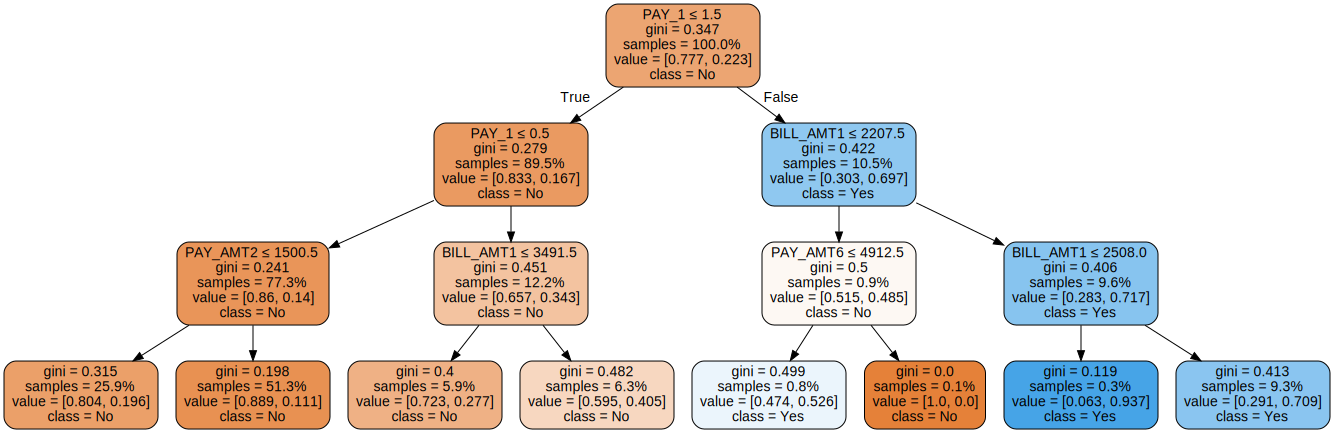

In [10]:
graph = graphviz.Source(dot_data)
graph

## Exercise 20: Finding Optimal Hyperparameters for a Decision Tree


In [11]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1,2,4,6,8,10,12]}
cv = GridSearchCV(clf, param_grid=params, scoring = 'roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1, pre_dispatch=None,
                  error_score=np.nan, return_train_score=True)

In [12]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [13]:
cv_results_df = pd.DataFrame(cv.cv_results_)

In [14]:
cv_results_df.sort_values(by='rank_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.020016,0.002387,0.002000,6.194296e-07,1,{'max_depth': 1},0.638488,0.643760,0.651084,0.642130,0.643865,0.004584,7,0.645659,0.643901,0.641458,0.644444,0.643865,0.001529
6,0.151766,0.001295,0.002500,5.015740e-04,12,{'max_depth': 12},0.671172,0.639559,0.666369,0.644508,0.655402,0.013589,6,0.890139,0.884675,0.898841,0.884183,0.889459,0.005899
5,0.129499,0.001659,0.002751,4.332567e-04,10,{'max_depth': 10},0.697716,0.692027,0.698890,0.671325,0.689990,0.011084,5,0.850113,0.843460,0.849810,0.839706,0.845772,0.004396
1,0.033984,0.001586,0.002257,4.285718e-04,2,{'max_depth': 2},0.694017,0.710380,0.704507,0.688353,0.699314,0.008626,4,0.701508,0.696072,0.698038,0.702864,0.699621,0.002701
4,0.109248,0.002165,0.002501,5.000236e-04,8,{'max_depth': 8},0.721765,0.725462,0.726688,0.711099,0.721254,0.006136,3,0.811290,0.806741,0.805728,0.805111,0.807218,0.002422
2,0.060756,0.002682,0.002243,4.196316e-04,4,{'max_depth': 4},0.723360,0.752827,0.751556,0.726670,0.738603,0.013646,2,0.755422,0.749997,0.748455,0.750569,0.751111,0.002607
3,0.083768,0.000833,0.002492,4.771706e-04,6,{'max_depth': 6},0.730610,0.752721,0.748626,0.731261,0.740805,0.009977,1,0.782812,0.773716,0.770871,0.773894,0.775323,0.004487


Text(0, 0.5, 'ROC AUC')

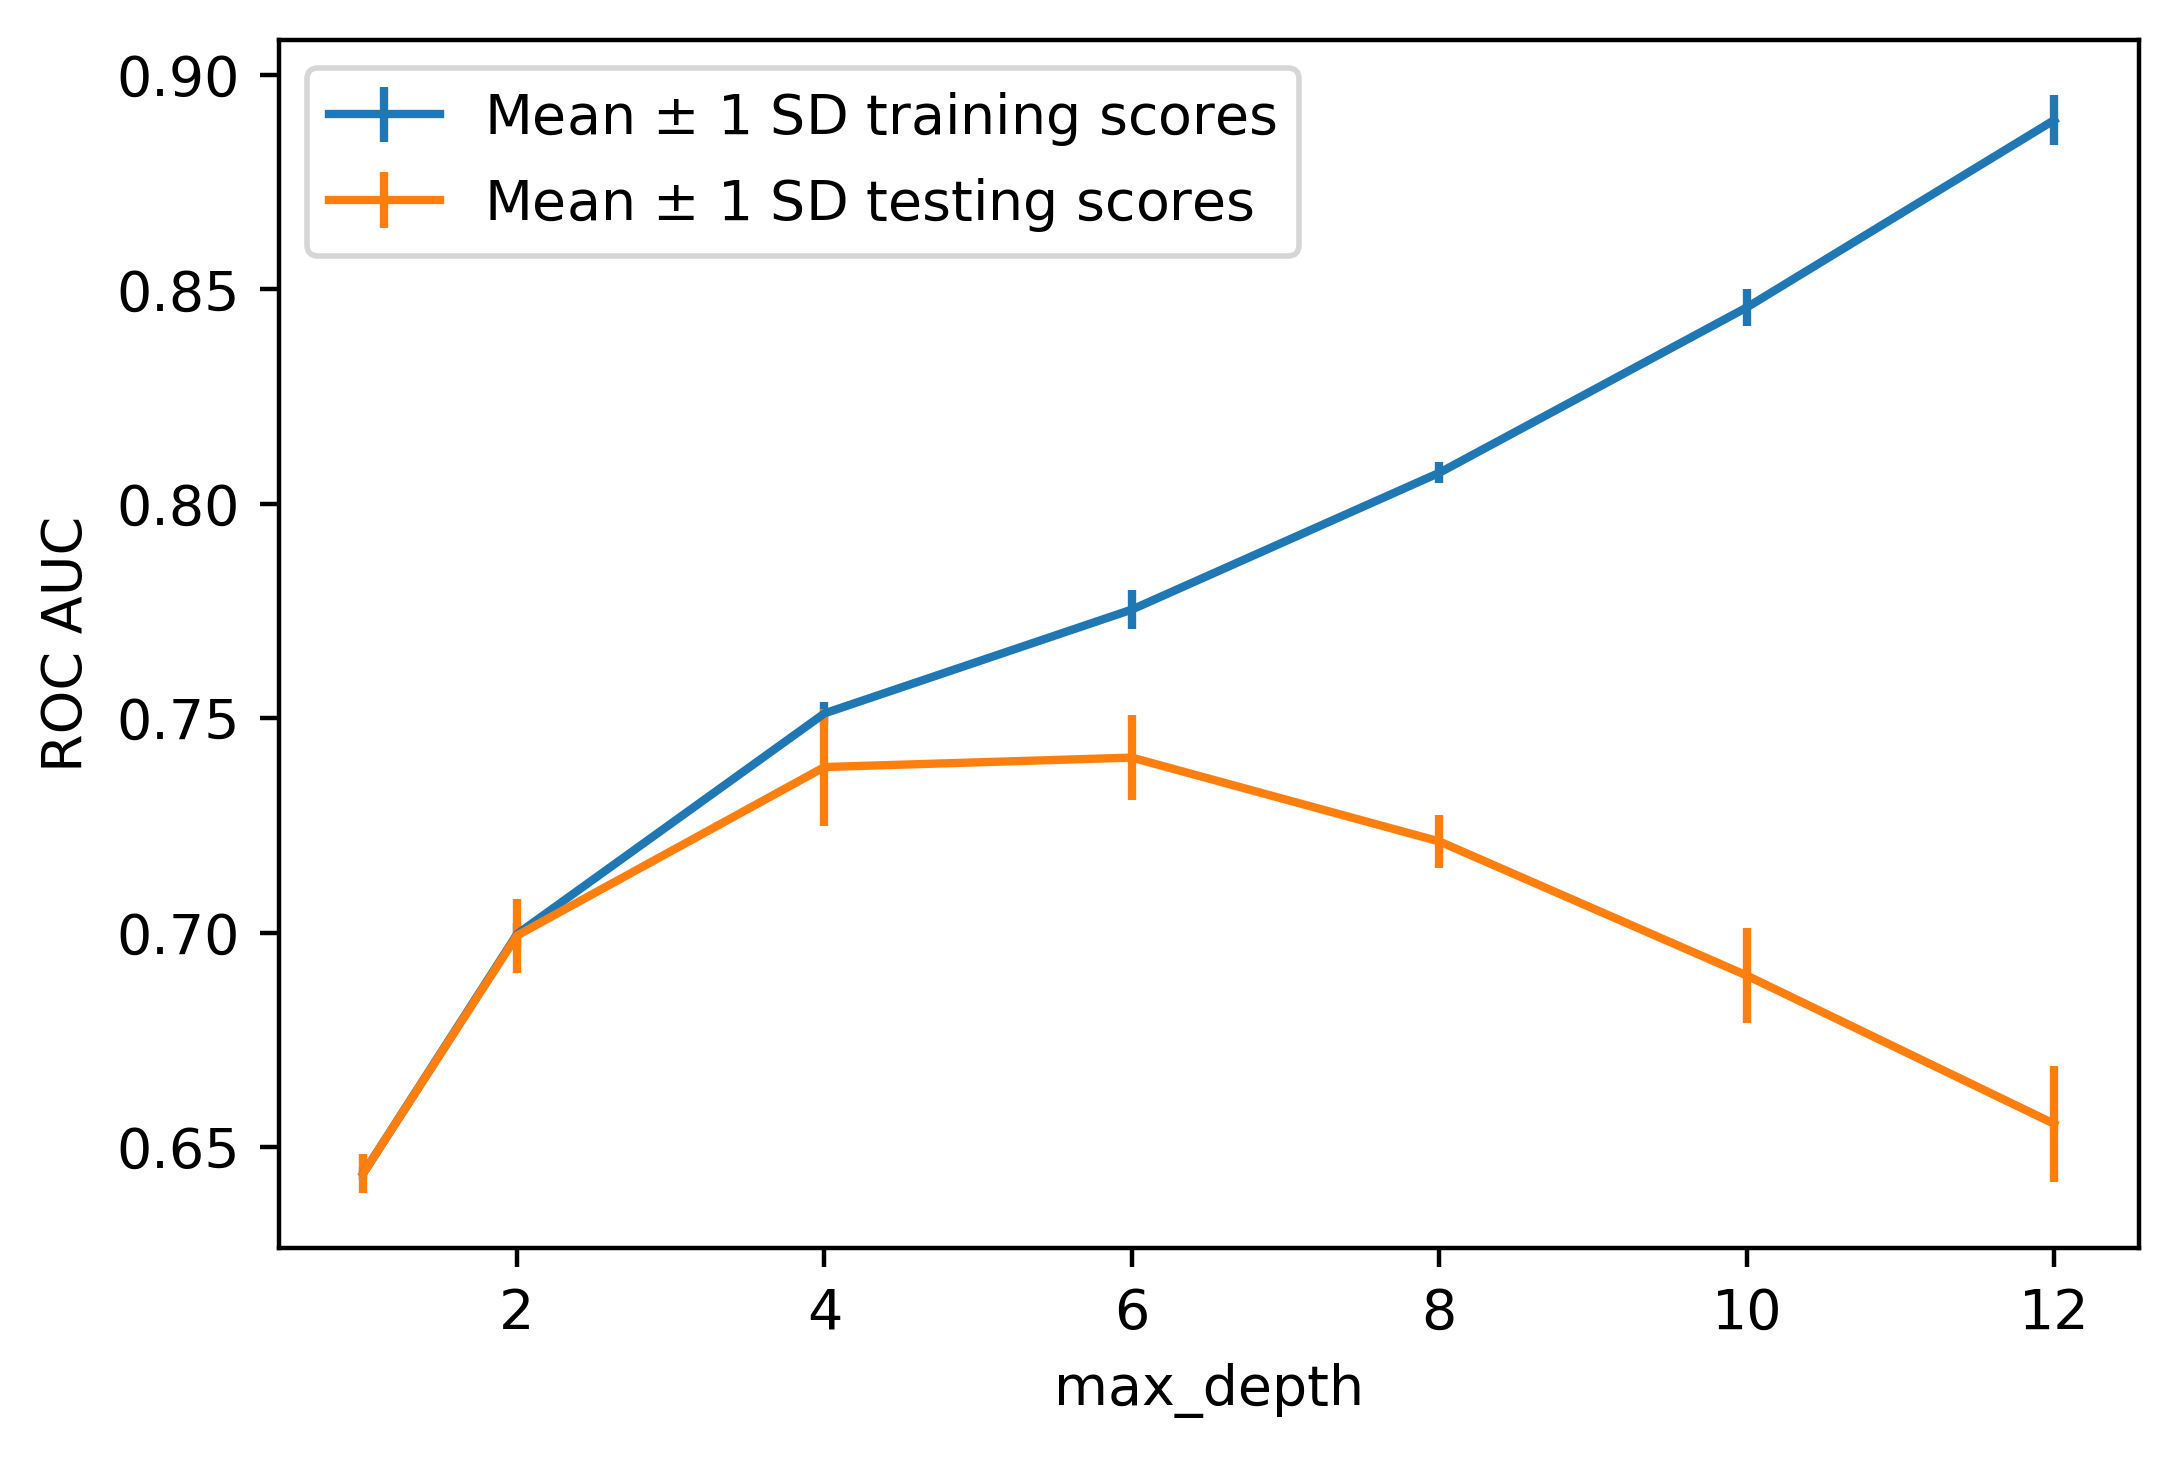

In [15]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
 cv_results_df['mean_train_score'],
 yerr=cv_results_df['std_train_score'],
 label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
 cv_results_df['mean_test_score'],
 yerr=cv_results_df['std_test_score'],
 label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

## Exercise 21: Fitting a Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [17]:
rf = RandomForestClassifier(
    n_estimators=10,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=4,
    verbose=0,
    warm_start=False,
    class_weight=None
)

In [18]:
rf_params_ex = {
    'n_estimators':list(range(10,110, 10))
}

In [19]:
cv_rf_ex = GridSearchCV(
    rf,
    param_grid=rf_params_ex,
    scoring='roc_auc',
    n_jobs=None,
    refit=True,
    cv=4,
    pre_dispatch=None,
    error_score=np.nan,
    return_train_score=True

)

In [20]:
cv_rf_ex.fit(X_train,y_train)
cv_rf_ex_results = pd.DataFrame(cv_rf_ex.cv_results_)

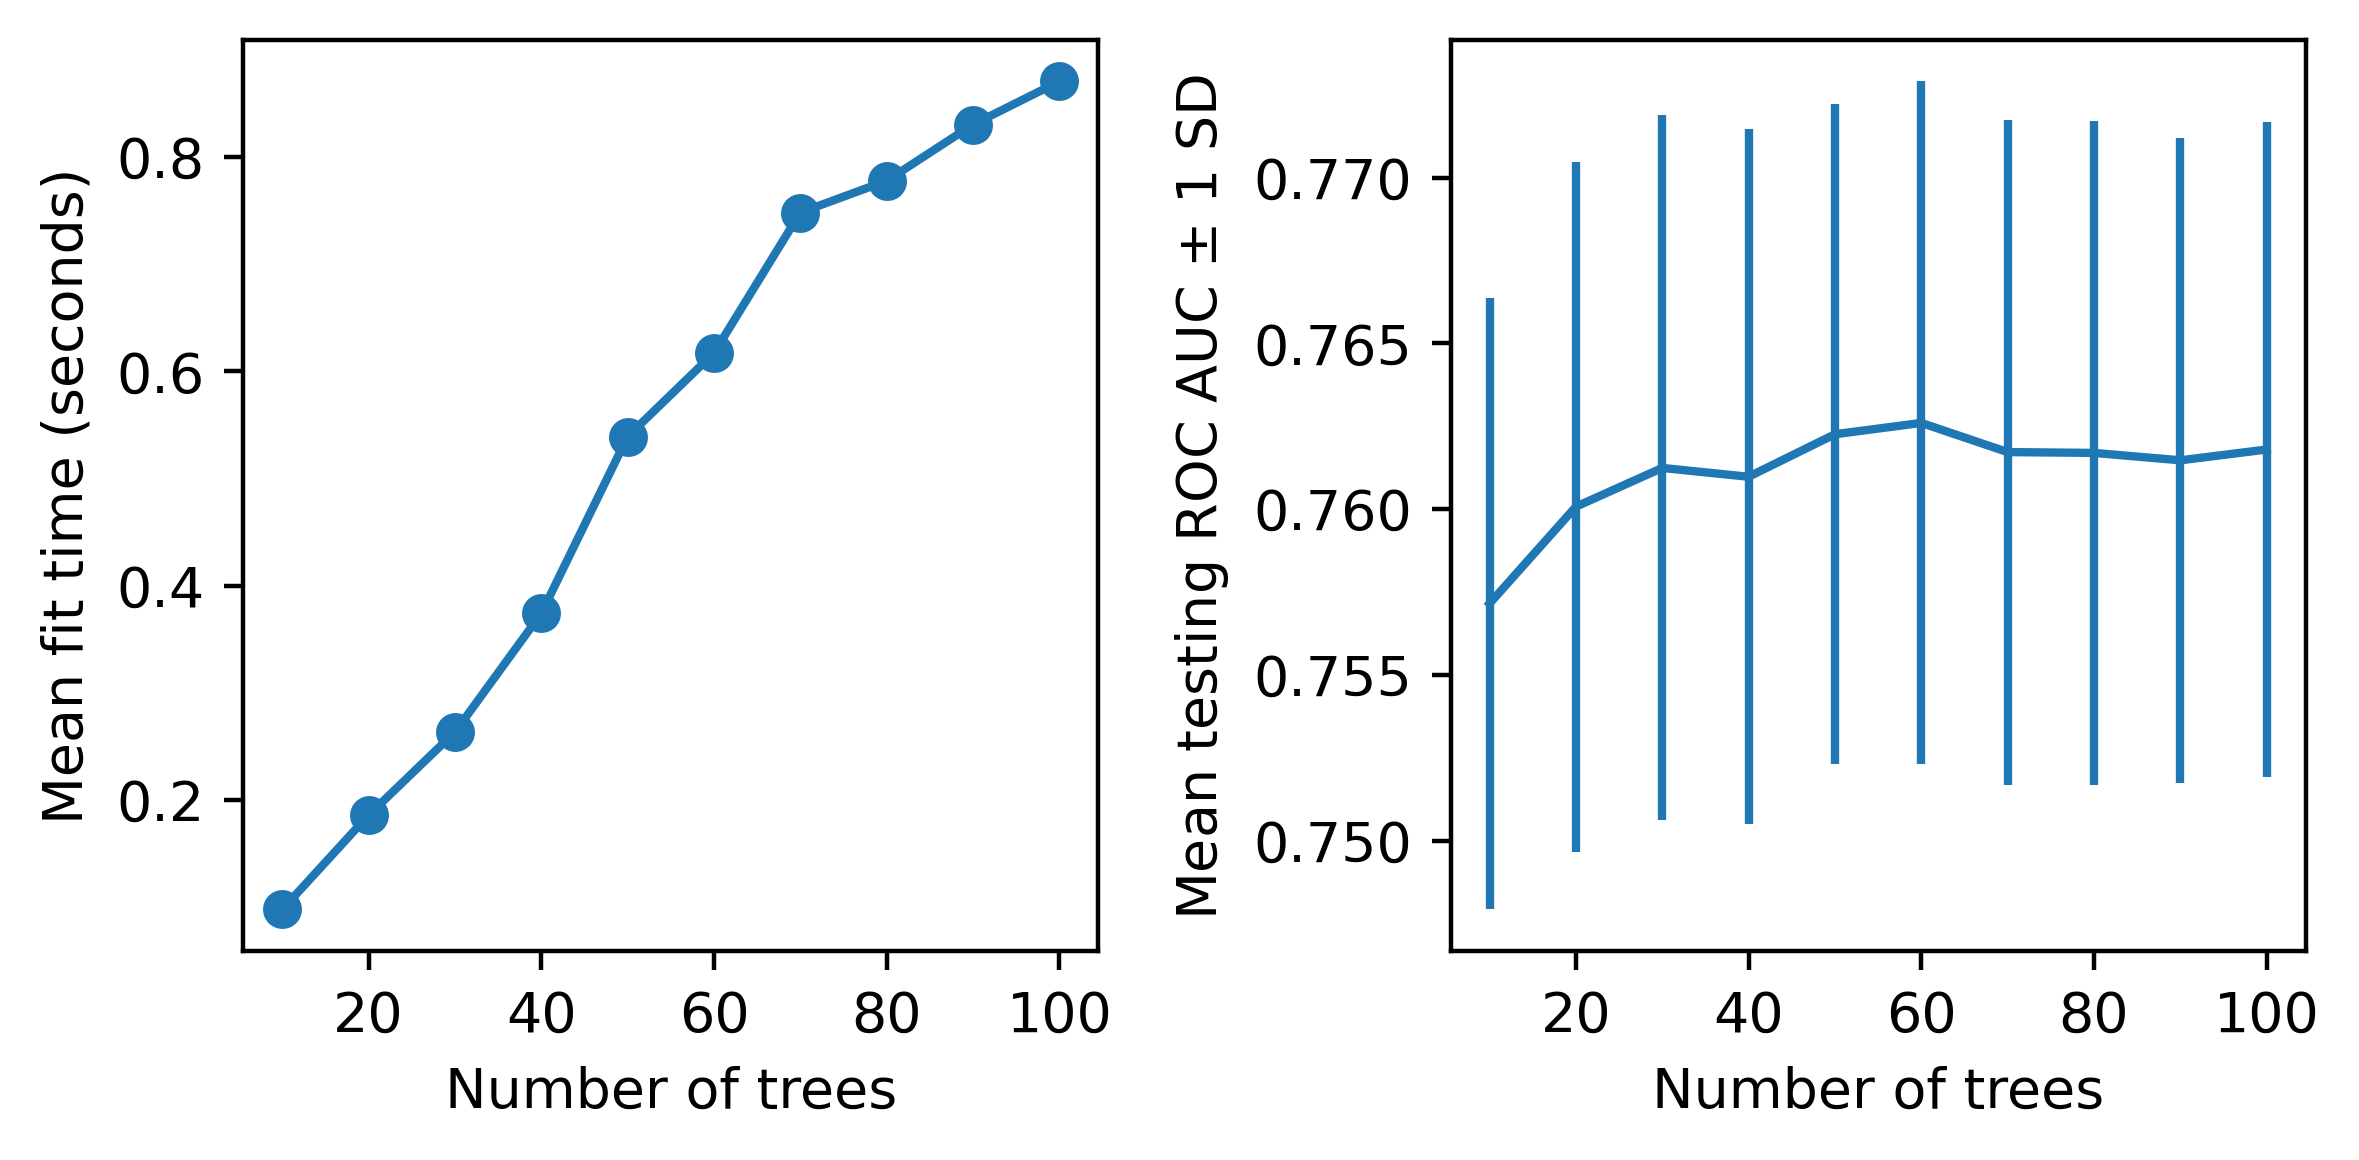

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results['param_n_estimators'],
 cv_rf_ex_results['mean_fit_time'],
 '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results['param_n_estimators'],
 cv_rf_ex_results['mean_test_score'],
 yerr=cv_rf_ex_results['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [22]:
cv_rf_ex.best_params_

{'n_estimators': 60}

In [24]:
feat_importances_df = pd.DataFrame({
    'Feature Name' : features_response[:-1],
    'Importance' : cv_rf_ex.best_estimator_.feature_importances_
})

In [26]:
feat_importances_df.sort_values(by='Importance', ascending=False)

,Feature Name,Importance
4,PAY_1,0.629723
11,PAY_AMT1,0.083237
0,LIMIT_BAL,0.073190
12,PAY_AMT2,0.040695
13,PAY_AMT3,0.040080
14,PAY_AMT4,0.023350
6,BILL_AMT2,0.020384
8,BILL_AMT4,0.018399
15,PAY_AMT5,0.014258
16,PAY_AMT6,0.013639


### Activity 5: Cross-Validation Grid Search with Random Forest

In [56]:
rf_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [58]:
cv_rf = GridSearchCV(rf, param_grid=rf_params, scoring='roc_auc',
                  n_jobs=-1, refit=True, cv=4, verbose=2,
                  error_score=np.nan, return_train_score=True)


In [60]:
cv_rf.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [62]:
cv_results_df = pd.DataFrame(cv_rf.cv_results_)

In [63]:
cv_results_df.sort_values(by='rank_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
12,0.335748,0.020693,0.013501,0.001658,12,10,"{'max_depth': 12, 'n_estimators': 10}",0.733598,0.760891,0.768261,0.748377,0.752782,0.013160,16,0.924159,0.925899,0.921584,0.929621,0.925316,0.002921
0,0.122248,0.011648,0.006501,0.000500,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.747044,0.764864,0.767739,0.748974,0.757155,0.009228,15,0.768189,0.762811,0.760037,0.765662,0.764175,0.003054
2,1.070248,0.019714,0.060250,0.013103,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.748007,0.765129,0.775254,0.758816,0.761802,0.009890,14,0.775021,0.767462,0.766160,0.772277,0.770230,0.003584
3,2.328405,0.038925,0.093750,0.012657,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.747690,0.765680,0.775876,0.759332,0.762145,0.010221,13,0.775466,0.768364,0.766153,0.772108,0.770523,0.003560
1,0.557499,0.017685,0.027001,0.003741,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.748373,0.766421,0.775473,0.758786,0.762263,0.009960,12,0.775133,0.768010,0.767014,0.771937,0.770523,0.003236
8,0.271000,0.015032,0.008999,0.000708,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.754927,0.774836,0.774214,0.758328,0.765576,0.009032,11,0.857800,0.854761,0.853688,0.858620,0.856217,0.002049
4,0.220000,0.036750,0.008750,0.002047,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.755471,0.774181,0.776602,0.762715,0.767242,0.008585,10,0.801355,0.794836,0.792639,0.799962,0.797198,0.003581
13,1.586498,0.016651,0.046000,0.003240,12,50,"{'max_depth': 12, 'n_estimators': 50}",0.757144,0.776286,0.783307,0.769430,0.771542,0.009653,9,0.943056,0.945824,0.943241,0.944835,0.944239,0.001147
7,3.537393,0.042538,0.117250,0.008166,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.758159,0.778805,0.786940,0.768054,0.772990,0.010871,8,0.806979,0.806629,0.803610,0.807958,0.806294,0.001624
5,0.810498,0.021800,0.027001,0.001871,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.760382,0.778613,0.786083,0.767475,0.773138,0.009904,7,0.806758,0.803553,0.801773,0.807306,0.804848,0.002281


In [64]:
cv_results_df.max()

C:\Users\cassi\AppData\Local\Temp/ipykernel_8484/2653239306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cv_results_df.max()


mean_fit_time         6.289543
std_fit_time          0.078553
mean_score_time         0.1895
std_score_time        0.031819
param_max_depth             12
param_n_estimators         200
split0_test_score     0.760401
split1_test_score     0.781617
split2_test_score      0.78694
split3_test_score     0.772327
mean_test_score       0.774744
std_test_score         0.01316
rank_test_score             16
split0_train_score    0.946647
split1_train_score    0.949507
split2_train_score    0.946565
split3_train_score    0.947568
mean_train_score      0.947419
std_train_score       0.003584
dtype: object

In [65]:
xx_rf, yy_rf = np.meshgrid(range(5), range(5))
cm_rf = plt.cm.jet

Text(0, 0.5, 'Maximum depth')

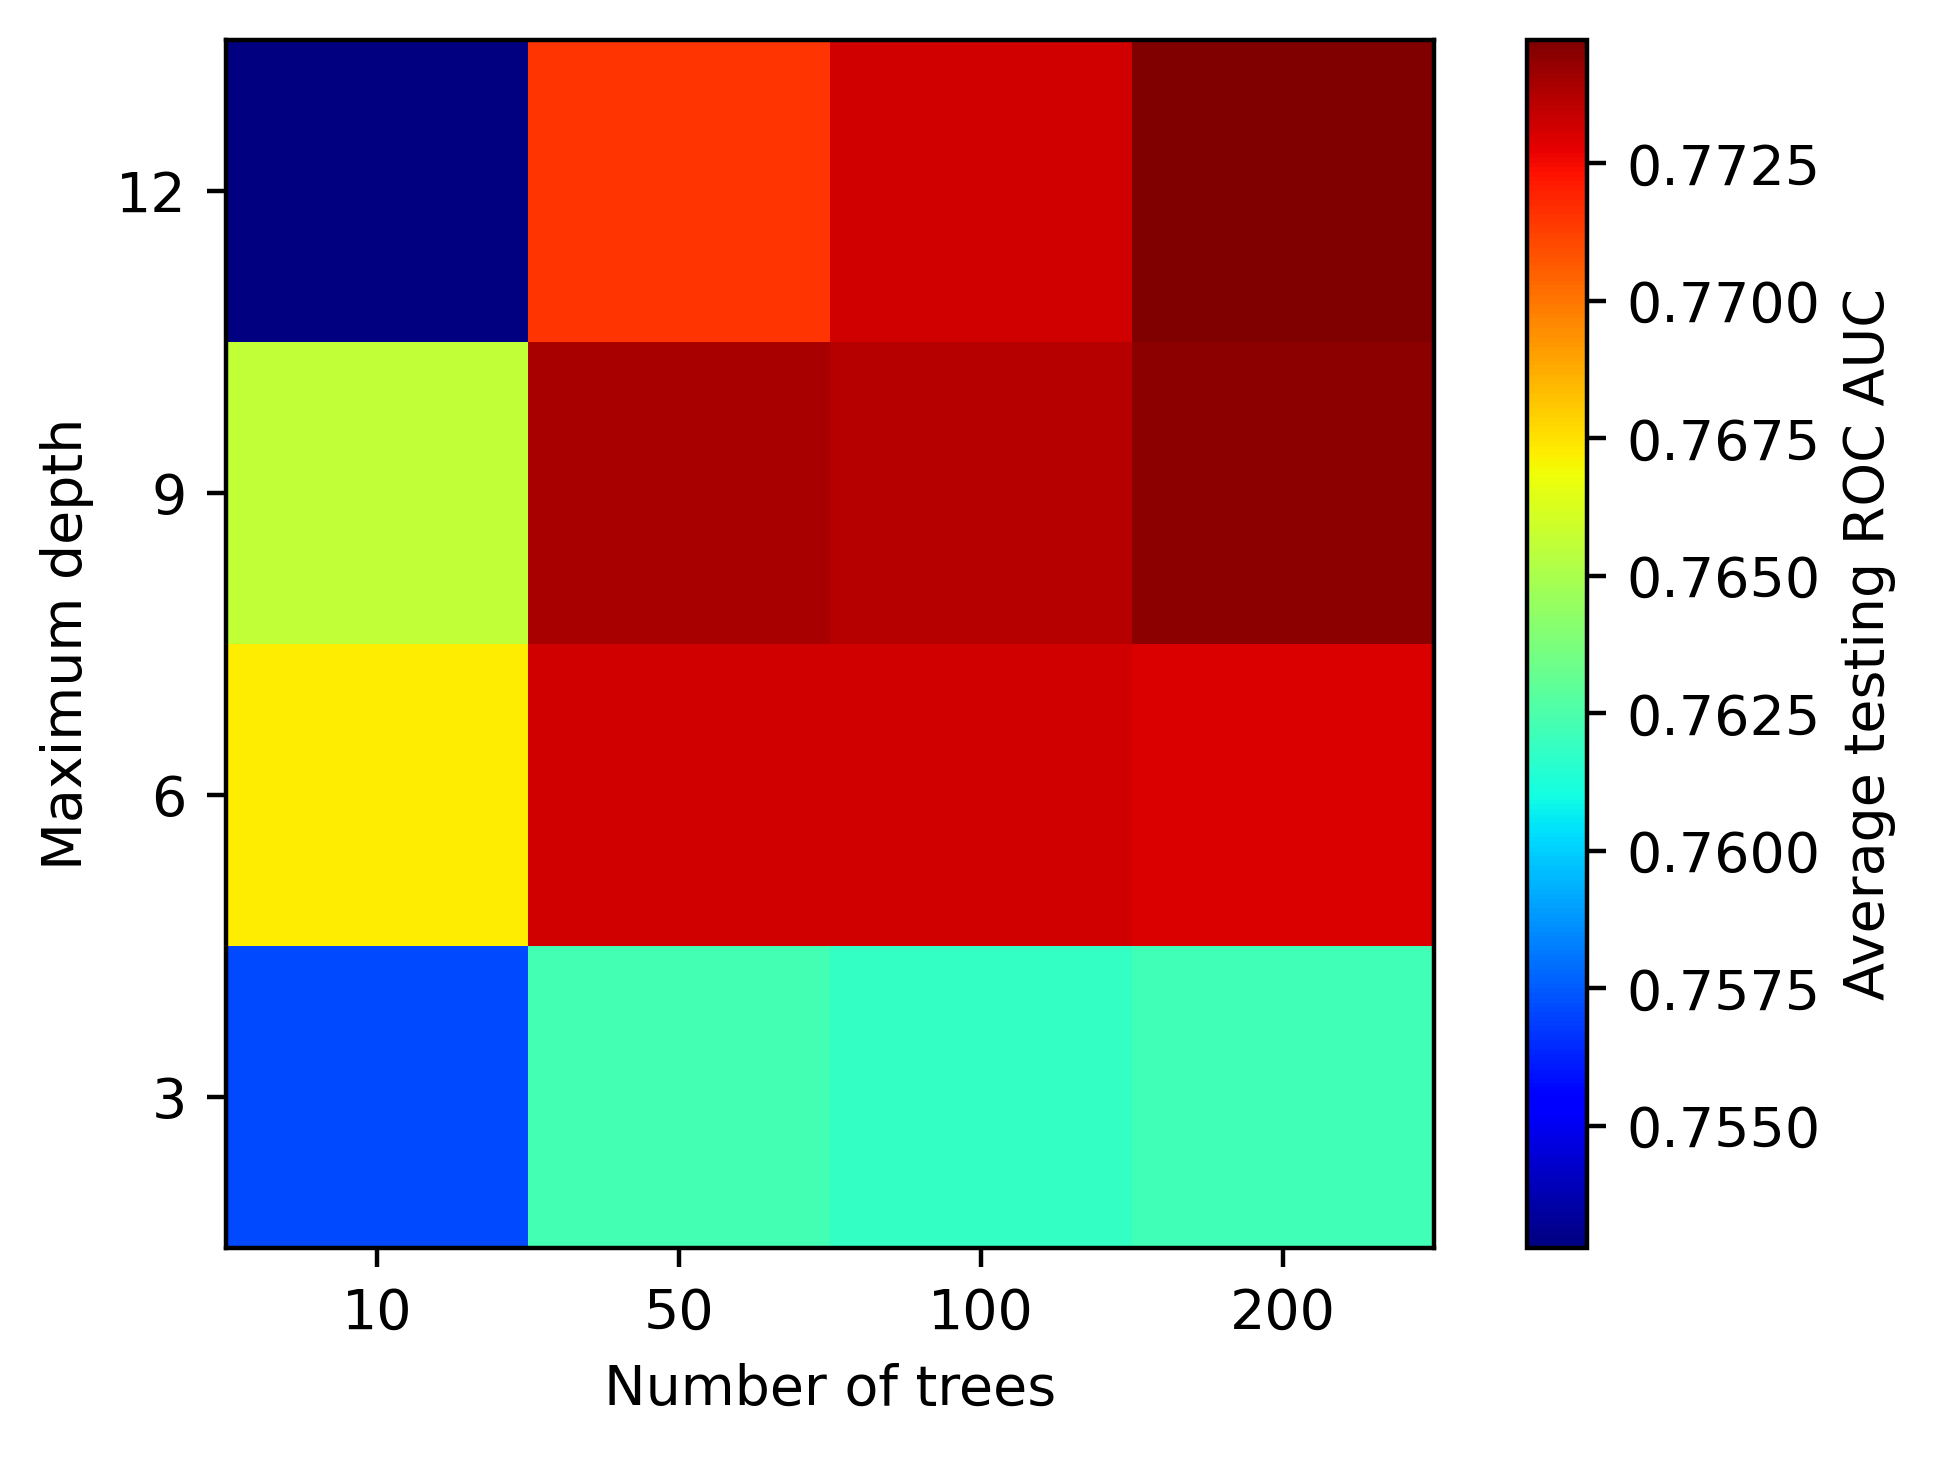

In [69]:
ax_rf = plt.axes()
pcolor_graph = ax_rf.pcolormesh(xx_rf, yy_rf, cv_results_df['mean_test_score'].values.reshape((4,4)), cmap=cm_rf)
plt.colorbar(pcolor_graph, label='Average testing ROC AUC')
ax_rf.set_aspect('equal')
ax_rf.set_xticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_yticks([0.5, 1.5, 2.5, 3.5])
ax_rf.set_xticklabels([str(tick_label) for tick_label in rf_params['n_estimators']])
ax_rf.set_yticklabels([str(tick_label) for tick_label in rf_params['max_depth']])
ax_rf.set_xlabel('Number of trees')
ax_rf.set_ylabel('Maximum depth')

Text(0, 0.5, 'ROC AUC')

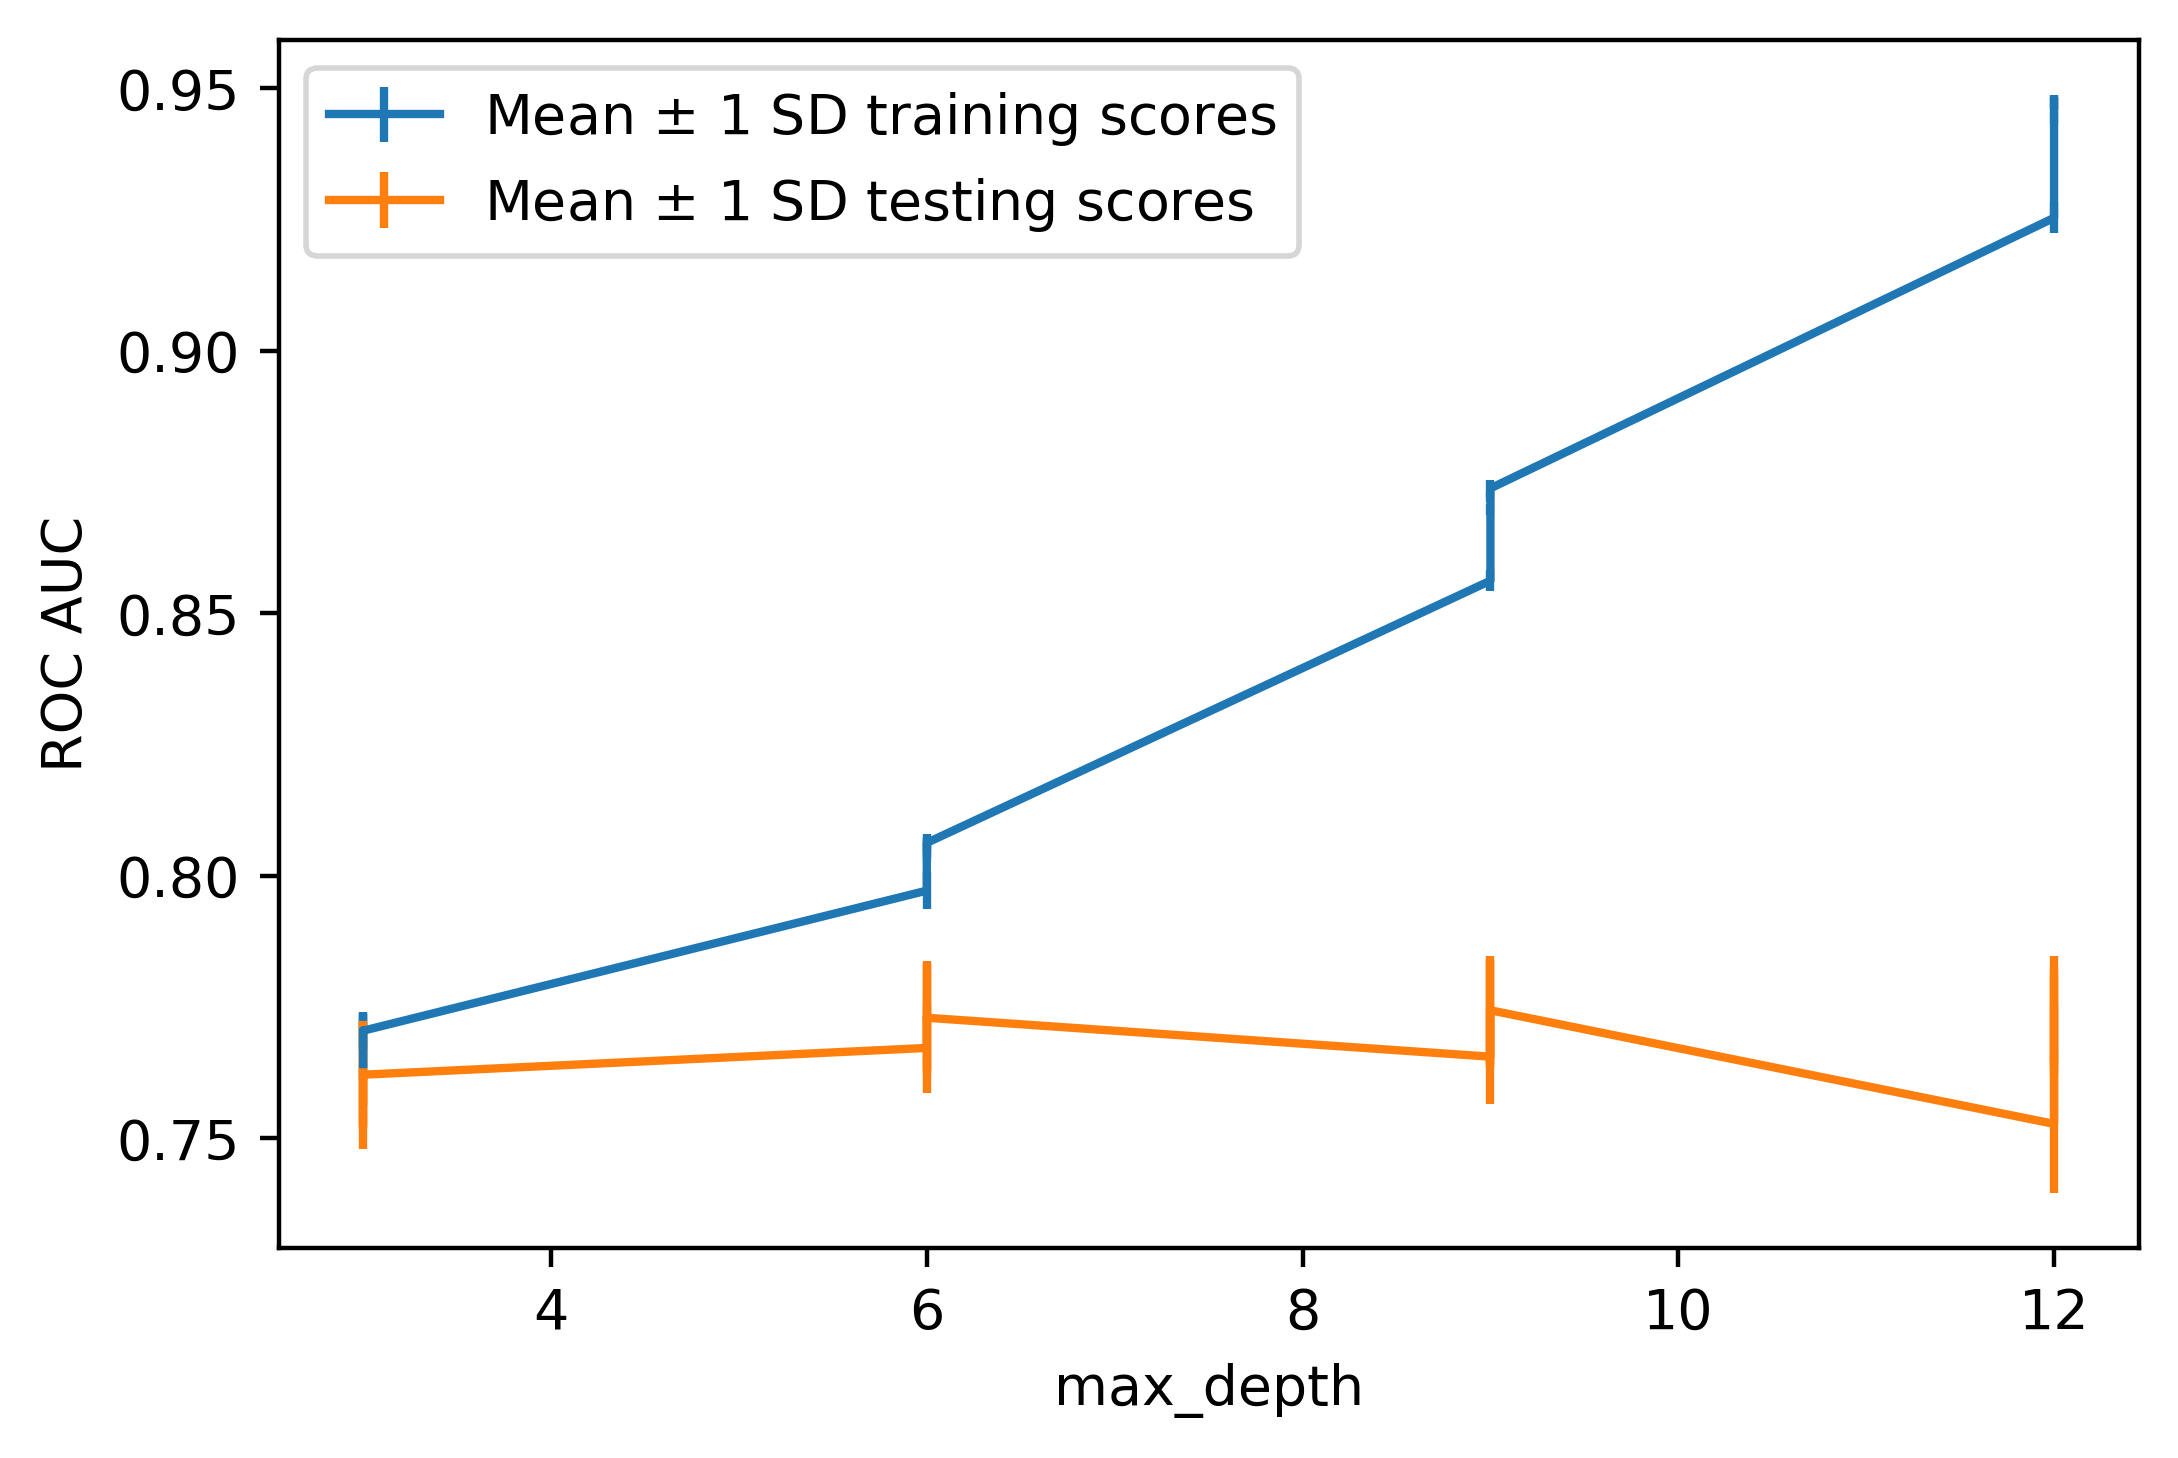

In [68]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
 cv_results_df['mean_train_score'],
 yerr=cv_results_df['std_train_score'],
 label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
 cv_results_df['mean_test_score'],
 yerr=cv_results_df['std_test_score'],
 label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [71]:
cv_rf.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [72]:
feat_imp_df_act = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf.best_estimator_.feature_importances_
})
feat_imp_df_act.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.292159
0,LIMIT_BAL,0.060776
11,PAY_AMT1,0.057658
5,BILL_AMT1,0.055900
12,PAY_AMT2,0.054086
6,BILL_AMT2,0.052971
13,PAY_AMT3,0.048504
7,BILL_AMT3,0.048416
8,BILL_AMT4,0.048106
10,BILL_AMT6,0.046768
